In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json

In [3]:
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

In [4]:
benchmarks_file = '../implementation/results/dummy-data-varying-n.json'
with open(benchmarks_file) as d:
    benchmarks = json.load(d)

In [13]:
plot_points = {}
for benchmark in benchmarks:
    client = benchmark['type']
    chain_size = benchmark['chainSize'] / 365
    if client not in plot_points:
        plot_points[client] = {}
    if chain_size not in plot_points[client]:
        plot_points[client][chain_size] = []
    
    bytesTransferred = benchmark['bytesDownloaded'] + benchmark['bytesUploaded']
    timeToSync = benchmark['timeToSync'] / 1000
    
    plot_points[client][chain_size].append([bytesTransferred, timeToSync])

In [7]:
lc_batchsizes = [1, 2, 5, 10, 25, 50]
slc_treedegree = [2, 3, 5, 10, 50, 100, 500, 1000, 3650]

superlight 4.0 13
superlight 6.0 13
superlight 8.0 13
superlight 10.0 14
light 4.0 9
light 6.0 9
light 8.0 9
light 10.0 9


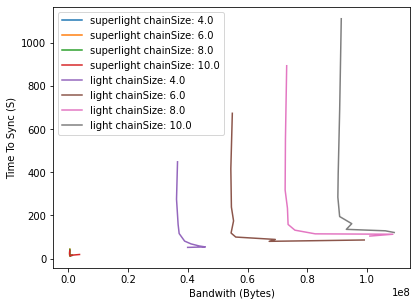

In [14]:
for client, client_benchmarks in plot_points.items():
    # if client == 'light':
    #     continue
    
    for chain_size, chain_size_benchmarks in client_benchmarks.items():
        _chain_size_benchmarks = np.array(chain_size_benchmarks)
        print(client, chain_size, _chain_size_benchmarks[:, 0].size)
        plt.plot(
            _chain_size_benchmarks[:, 0], 
            _chain_size_benchmarks[:, 1], 
            label='{} chainSize: {}'.format(client, chain_size)
        )

plt.xlabel('Bandwith (Bytes)')
plt.ylabel('Time To Sync (S)')
plt.legend()
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.show()
# for i, batchsize in enumerate(lc_batchsizes):
#     plt.annotate(batchsize, (lc_tos[i], lc_bandwidth[i]))
    
# for i, treedegree in enumerate(slc_treedegree):
#     plt.annotate(treedegree, (slc_tos[i], slc_bandwidth[i]))

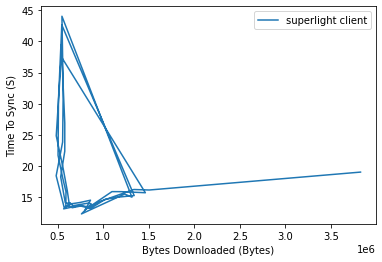

In [13]:
# plt.plot(lc_bytes, lc_tos, label='light client')
plt.plot(slc_bytes, slc_tos, label= 'superlight client')
plt.xlabel('Bytes Downloaded (Bytes)')
plt.ylabel('Time To Sync (S)')
plt.legend()

In [18]:
light_client_benchmarks = list(filter(lambda b: b['type'] == 'light', beacon_benchmarks))
superlight_client_benchmarks = list(filter(lambda b: b['type'] == 'superlight', beacon_benchmarks))

lc_tos_m, lc_tos_s, lc_b_m, lc_b_s, lc_i_m, lc_i_s = get_mean_std(light_client_benchmarks)
slc_tos_m, slc_tos_s, slc_b_m, slc_b_s, slc_i_m, slc_i_s = get_mean_std(superlight_client_benchmarks)

print('Implementation\t Time To Sync\t Bytes Downloaded\t Interactions')
print('Light Client\t {:.2f} ± {:.2f}\t {:.2f} ± {:.2f}\t {:.2f} ± {:.2f}'.format(lc_tos_m, lc_tos_s,  lc_b_m, lc_b_s, lc_i_m, lc_i_s))
print('Superlight Client\t {:.2f} ± {:.2f}\t {:.2f} ± {:.2f}\t {:.2f} ± {:.2f}'.format(slc_tos_m, slc_tos_s, slc_b_m, slc_b_s, slc_i_m, slc_i_s))


Implementation	 Time To Sync	 Bytes Downloaded	 Interactions
Light Client	 110.72 ± 7.00	 16.83 ± 0.21	 159.60 ± 1.96
Superlight Client	 62.63 ± 0.85	 2.29 ± 0.00	 163.00 ± 0.00


In [19]:
beacon_data_file = '../implementation/results/dummy-data-8-512-1024.json'
with open(beacon_data_file) as d:
    beacon_benchmarks = json.load(d)

light_client_benchmarks = list(filter(lambda b: b['type'] == 'light', beacon_benchmarks))
superlight_client_benchmarks = list(filter(lambda b: b['type'] == 'superlight', beacon_benchmarks))

lc_tos_m, lc_tos_s, lc_b_m, lc_b_s, lc_i_m, lc_i_s = get_mean_std(light_client_benchmarks)
slc_tos_m, slc_tos_s, slc_b_m, slc_b_s, slc_i_m, slc_i_s = get_mean_std(superlight_client_benchmarks)

print('Implementation\t Time To Sync\t Bytes Downloaded\t Interactions')
print('Light Client\t {:.2f} ± {:.2f}\t {:.2f} ± {:.2f}\t {:.2f} ± {:.2f}'.format(lc_tos_m, lc_tos_s,  lc_b_m, lc_b_s, lc_i_m, lc_i_s))
print('Superlight Client\t {:.2f} ± {:.2f}\t {:.2f} ± {:.2f}\t {:.2f} ± {:.2f}'.format(slc_tos_m, slc_tos_s, slc_b_m, slc_b_s, slc_i_m, slc_i_s))


Implementation	 Time To Sync	 Bytes Downloaded	 Interactions
Light Client	 803.42 ± 3.69	 106.58 ± 0.22	 1027.60 ± 2.11
Superlight Client	 92.95 ± 1.97	 2.27 ± 0.00	 205.00 ± 0.00


In [20]:
beacon_data_files_size = [
    '../implementation/results/dummy-data-8-512-128.json',
    '../implementation/results/dummy-data-8-512-256.json',
    '../implementation/results/dummy-data-8-512-512.json',
    '../implementation/results/dummy-data-8-512-1024.json'
]
sizes = [128, 256, 512, 1024]
benchmarks_l = []
benchmarks_sl = []
for i in range(0, 4):
    with open(beacon_data_files_size[i]) as d:
        beacon_benchmarks = json.load(d)
    light_client_benchmarks = list(filter(lambda b: b['type'] == 'light', beacon_benchmarks))
    superlight_client_benchmarks = list(filter(lambda b: b['type'] == 'superlight', beacon_benchmarks)) 
    
    entry_l = get_mean_std(light_client_benchmarks)
    benchmarks_l.append(list(entry_l))

    entry_sl = get_mean_std(superlight_client_benchmarks)
    benchmarks_sl.append(list(entry_sl))

benchmarks_l = np.array(benchmarks_l)
benchmarks_sl = np.array(benchmarks_sl)

/var/folders/s9/1q9y4wp570v3zg_pstdg4fc80000gn/T/ipykernel_53327/1444030361.py:12: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


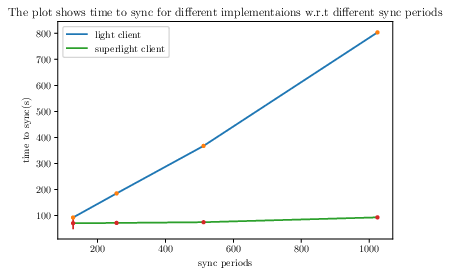

In [21]:
plt.plot(sizes, benchmarks_l[:, 0], label='light client')
plt.errorbar(sizes, benchmarks_l[:, 0], yerr=benchmarks_l[:, 1], fmt=".")

plt.plot(sizes, benchmarks_sl[:, 0], label='superlight client')
plt.errorbar(sizes, benchmarks_sl[:, 0], yerr=benchmarks_sl[:, 1], fmt=".")

plt.xlabel('sync periods')
plt.ylabel('time to sync(s)')
plt.title('The plot shows time to sync for different implementaions w.r.t different sync periods')
plt.legend()

plt.show()
plt.savefig('time-to-sync.pgf')

/var/folders/s9/1q9y4wp570v3zg_pstdg4fc80000gn/T/ipykernel_53327/3973624388.py:12: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


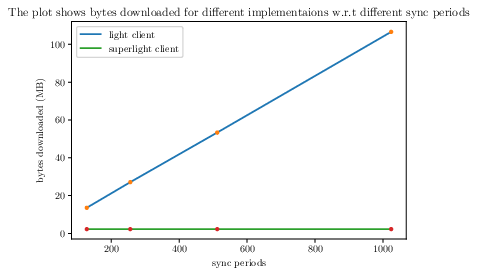

In [22]:
plt.plot(sizes, benchmarks_l[:, 2], label='light client')
plt.errorbar(sizes, benchmarks_l[:, 2], yerr=benchmarks_l[:, 3], fmt=".")

plt.plot(sizes, benchmarks_sl[:, 2], label='superlight client')
plt.errorbar(sizes, benchmarks_sl[:, 2], yerr=benchmarks_sl[:, 3], fmt=".")

plt.xlabel('sync periods')
plt.ylabel('bytes downloaded (MB)')
plt.title('The plot shows bytes downloaded for different implementaions w.r.t different sync periods')
plt.legend()

plt.show()
plt.savefig('time-to-sync-vs-periods.pgf')

/var/folders/s9/1q9y4wp570v3zg_pstdg4fc80000gn/T/ipykernel_53327/544418871.py:12: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


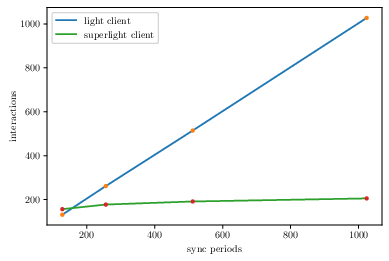

In [23]:
plt.plot(sizes, benchmarks_l[:, 4], label='light client')
plt.errorbar(sizes, benchmarks_l[:, 4], yerr=benchmarks_l[:, 5], fmt=".")

plt.plot(sizes, benchmarks_sl[:, 4], label='superlight client')
plt.errorbar(sizes, benchmarks_sl[:, 4], yerr=benchmarks_sl[:, 5], fmt=".")

plt.xlabel('sync periods')
plt.ylabel('interactions')
# plt.title('The plot shows interactions for different implementaions w.r.t different sync periods')
plt.legend()

plt.show()
plt.savefig('interactions-vs-periods.pgf')

In [24]:
beacon_data_files_provers = [
    '../implementation/results/dummy-data-4-512-1024.json',
    '../implementation/results/dummy-data-8-512-1024.json',
    '../implementation/results/dummy-data-12-512-1024.json',
    '../implementation/results/dummy-data-14-512-1024.json'
]
prover_cnt = [4, 8, 12, 14]
benchmarks_l = []
benchmarks_sl = []
for i in range(0, 4):
    with open(beacon_data_files_provers[i]) as d:
        beacon_benchmarks = json.load(d)
    light_client_benchmarks = list(filter(lambda b: b['type'] == 'light', beacon_benchmarks))
    superlight_client_benchmarks = list(filter(lambda b: b['type'] == 'superlight', beacon_benchmarks)) 
    
    entry_l = get_mean_std(light_client_benchmarks)
    benchmarks_l.append(list(entry_l))

    entry_sl = get_mean_std(superlight_client_benchmarks)
    benchmarks_sl.append(list(entry_sl))

benchmarks_l = np.array(benchmarks_l)
benchmarks_sl = np.array(benchmarks_sl)

/var/folders/s9/1q9y4wp570v3zg_pstdg4fc80000gn/T/ipykernel_53327/2625670417.py:12: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


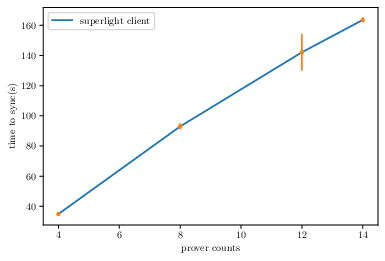

In [25]:
# plt.plot(prover_cnt, benchmarks_l[:, 0], label='light client')
# plt.errorbar(prover_cnt, benchmarks_l[:, 0], yerr=benchmarks_l[:, 1], fmt=".")

plt.plot(prover_cnt, benchmarks_sl[:, 0], label='superlight client')
plt.errorbar(prover_cnt, benchmarks_sl[:, 0], yerr=benchmarks_sl[:, 1], fmt=".")

plt.xlabel('prover counts')
plt.ylabel('time to sync(s)')
# plt.title('The plot shows time to sync for different implementaions w.r.t prover counts')
plt.legend()

plt.show()
plt.savefig('time-to-sync-vs-provers.pgf')

/var/folders/s9/1q9y4wp570v3zg_pstdg4fc80000gn/T/ipykernel_53327/1395975761.py:12: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


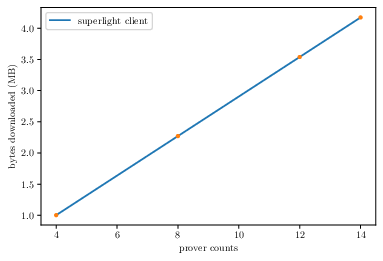

In [26]:
# plt.plot(prover_cnt, benchmarks_l[:, 2], label='light client')
# plt.errorbar(prover_cnt, benchmarks_l[:, 2], yerr=benchmarks_l[:, 3], fmt=".")

plt.plot(prover_cnt, benchmarks_sl[:, 2], label='superlight client')
plt.errorbar(prover_cnt, benchmarks_sl[:, 2], yerr=benchmarks_sl[:, 3], fmt=".")

plt.xlabel('prover counts')
plt.ylabel('bytes downloaded (MB)')
# plt.title('The plot shows bytes downloaded for different implementaions w.r.t prover counts')
plt.legend()

plt.show()
plt.savefig('bytes-downloaded-vs-provers.pgf')

/var/folders/s9/1q9y4wp570v3zg_pstdg4fc80000gn/T/ipykernel_53327/2450797814.py:12: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


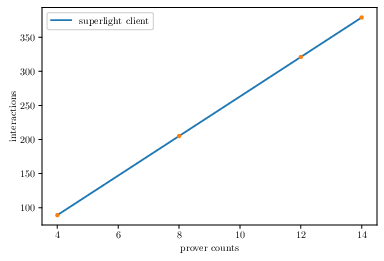

In [27]:
# plt.plot(prover_cnt, benchmarks_l[:, 4], label='light client')
# plt.errorbar(prover_cnt, benchmarks_l[:, 4], yerr=benchmarks_l[:, 5], fmt=".")

plt.plot(prover_cnt, benchmarks_sl[:, 4], label='superlight client')
plt.errorbar(prover_cnt, benchmarks_sl[:, 4], yerr=benchmarks_sl[:, 5], fmt=".")

plt.xlabel('prover counts')
plt.ylabel('interactions')
# plt.title('The plot shows interactions for different implementaions w.r.t prover count')
plt.legend()

plt.show()
plt.savefig('interactions-vs-provers.pgf')